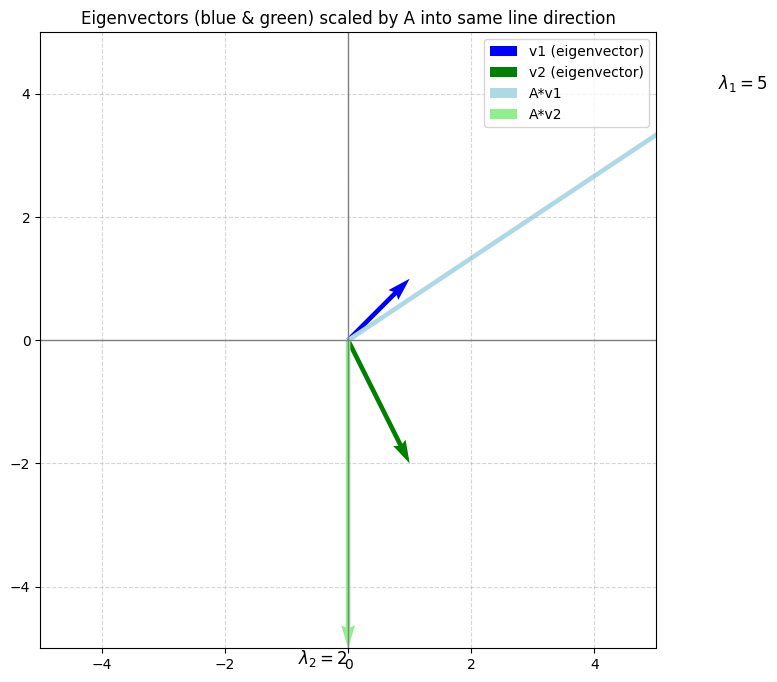

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Transformation matrix A
A = np.array([[4, 2],
              [1, 3]])

# Plot settings
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)

# Example original vectors
v1 = np.array([1, 1])
v2 = np.array([1, -2])

# Transform them
Av1 = A @ v1
Av2 = A @ v2

# Plot original vectors
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1 (eigenvector)')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='green', label='v2 (eigenvector)')

# Plot transformed vectors
ax.quiver(0, 0, Av1[0], Av1[1], angles='xy', scale_units='xy', scale=1, color='lightblue', label='A*v1')
ax.quiver(0, 0, Av2[0], Av2[1], angles='xy', scale_units='xy', scale=1, color='lightgreen', label='A*v2')

# Annotate eigenvalues
ax.text(Av1[0], Av1[1], f"$\lambda_1=5$", fontsize=12, ha='left', va='bottom')
ax.text(Av2[0], Av2[1], f"$\lambda_2=2$", fontsize=12, ha='right', va='top')

# Legend and show
ax.legend()
plt.title("Eigenvectors (blue & green) scaled by A into same line direction")
plt.show()



#### 📌 **1. Intuition with transformation**

* You started with a **matrix transformation** of unit vectors (i.e., applying a matrix to the standard basis vectors I and J).
* Showed how the transformation changes their positions, scaling or squeezing the area, which is captured by the **determinant**.

---

#### 📌 **2. Determinant recap**

* Determinant represents the **area scaling factor** of the transformation (positive, negative, or zero).
* If determinant = 0, the matrix **flattens space** and is **not invertible**.

---

#### 📌 **3. Eigenvectors and eigenvalues visualization**

* Used a visualization tool that:

  * Showed **normal vectors** changing both magnitude and direction under transformation.
  * Showed **eigenvectors** as special vectors that **don’t change direction**, only get **stretched or compressed** (scaled).

---

#### 📌 **4. Formal definitions**

* **Eigenvector**:
  A nonzero vector that only **changes in scale**, not in direction, under the transformation.
* **Eigenvalue (λ)**:
  A scalar that tells **by how much** the eigenvector is stretched or compressed.

---

#### 📝 **5. Mathematical formulation**

* You wrote the classic eigen equation:

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

* Explained how to compute eigenvalues by solving:

$$
\det(A - \lambda I) = 0
$$

to get eigenvalues (λ).

* Then plug λ into

$$
(A - \lambda I)\mathbf{v} = 0
$$

to find the corresponding eigenvectors (v).

---

#### ⚙ **6. Example calculation**

* Took a matrix:

$$
A = \begin{bmatrix}
4 & 1 \\
2 & 3
\end{bmatrix}
$$

* Found eigenvalues by solving:

$$
\det(A - \lambda I) = (4-\lambda)(3-\lambda)-2 = \lambda^2 -7\lambda +10 =0
$$

which gave λ=5 and λ=2.

* Found eigenvectors by solving systems like:

$$
(A - 5I)\mathbf{v}=0
$$

which led to eigenvectors like (1,1) and (1, -2).

---

#### 💡 **7. Interpretation**

* **Eigenvectors** give **directions** in space that stay the same under the transformation, only scale.
* **Eigenvalues** tell how much the eigenvector is **stretched or shrunk**.

---

### 🛠 **Applications**

* Mentioned their primary use in **Principal Component Analysis (PCA)** for **dimensionality reduction**, where eigenvectors indicate principal directions and eigenvalues indicate the variance explained.

---

### ✅ **Key takeaways**

| Concept     | Meaning                                   |
| ----------- | ----------------------------------------- |
| Eigenvector | Direction unchanged by transformation     |
| Eigenvalue  | Amount of stretching along that direction |
| Determinant | Area/volume scaling factor                |

---

### 📌 **Conclusion**

> You emphasized that while the detailed derivation is less important for data science practitioners, the **conceptual understanding** is critical because eigenvectors and eigenvalues underlie algorithms like PCA.



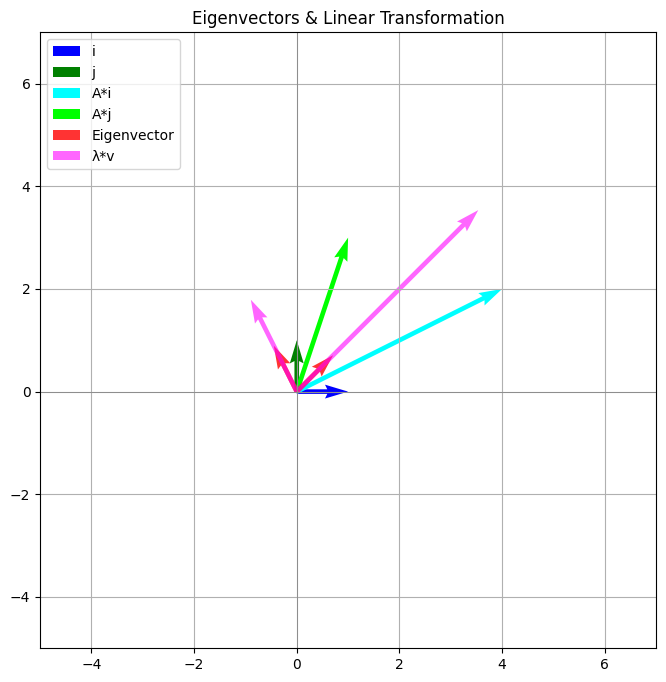

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix A
A = np.array([[4, 1],
              [2, 3]])

# Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(A)

# Original basis vectors (i and j)
i = np.array([1, 0])
j = np.array([0, 1])

# Transformed vectors
Ai = A @ i
Aj = A @ j

# Setup plot
fig, ax = plt.subplots(figsize=(8,8))

# Plot original basis vectors
ax.quiver(0, 0, i[0], i[1], angles='xy', scale_units='xy', scale=1, color='blue', label='i')
ax.quiver(0, 0, j[0], j[1], angles='xy', scale_units='xy', scale=1, color='green', label='j')

# Plot transformed vectors
ax.quiver(0, 0, Ai[0], Ai[1], angles='xy', scale_units='xy', scale=1, color='cyan', label='A*i')
ax.quiver(0, 0, Aj[0], Aj[1], angles='xy', scale_units='xy', scale=1, color='lime', label='A*j')

# Plot eigenvectors and scaled eigenvectors
for val, vec in zip(eigvals, eigvecs.T):
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8, label='Eigenvector')
    scaled_vec = val * vec
    ax.quiver(0, 0, scaled_vec[0], scaled_vec[1], angles='xy', scale_units='xy', scale=1, color='magenta', alpha=0.6, label=f'λ*v')

# Final plot setup
ax.set_xlim(-5,7)
ax.set_ylim(-5,7)
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.grid(True)
ax.set_aspect('equal')
# Prevent duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')
plt.title("Eigenvectors & Linear Transformation")
plt.show()


## 📈 1. Equation of a straight line (2D)

* The classic line equation is:

  $$
  y = mx + c
  $$

  * $m$ is **slope** (rise over run).
  * $c$ is **y-intercept**, where the line crosses the y-axis.

* Another common form:

  $$
  ax + by + c = 0
  $$

  * Can be rearranged into slope-intercept form.

* Or using ML notation:

  $$
  y = \beta_0 + \beta_1 x
  $$

---

## 📝 2. Vector form of line equation

* Often written as:

  $$
  w_1 x_1 + w_2 x_2 + b = 0
  $$

  where

  * $x_1, x_2$ are coordinates (features).
  * $w_1, w_2$ are weights (coefficients).
  * $b$ is the intercept.

* In compact **matrix (vector) notation**:

$$
w^T x + b = 0
$$

where

* $w = [w_1, w_2]^T$
* $x = [x_1, x_2]^T$

---

## 🏞 3. Plane in 3D

* For three features:

$$
w_1 x_1 + w_2 x_2 + w_3 x_3 + b = 0
$$

* Vector form:

$$
w^T x + b = 0
$$

where

* $w = [w_1, w_2, w_3]^T$
* $x = [x_1, x_2, x_3]^T$

This defines a **plane** in 3D.

---

## 🌌 4. Hyperplane in n-D

* In general for n features:

$$
w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = 0
$$

or

$$
w^T x + b = 0
$$

This is called a **hyperplane**, a generalization of lines and planes to higher dimensions.

---

## 🔥 5. Special case: line or plane passing through the origin

* If the intercept $b = 0$, the equation simplifies to:

$$
w^T x = 0
$$

* This means the line (or plane) passes through the origin.

---

## 📐 6. Geometric interpretation

* The dot product:

$$
w^T x = \|w\| \|x\| \cos \theta
$$

* So, if

$$
w^T x = 0
$$

then

$$
\cos \theta = 0 \implies \theta = 90^\circ
$$

* Thus, $w$ is **perpendicular (normal)** to the line, plane or hyperplane.

---

## 🚀 7. Summary of usage

| Dimension | Object     | Equation        |
| --------- | ---------- | --------------- |
| 2D        | Line       | $w^T x + b = 0$ |
| 3D        | Plane      | $w^T x + b = 0$ |
| nD        | Hyperplane | $w^T x + b = 0$ |

* In ML algorithms (like SVMs, logistic regression), we often find such hyperplanes to **separate data**.

